In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv(r'C:\Users\vinay\Downloads\StudentsPerformance.csv')

In [3]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [5]:
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [6]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['result'] = df['average_score'].apply(lambda x: 1 if x >= 40 else 0)

In [7]:
df_encoded = pd.get_dummies(df.drop(['average_score'], axis=1), drop_first=True)

In [8]:
X = df_encoded.drop('result', axis=1)
y = df_encoded['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
y_pred = model.predict(X_test)

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [12]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[ 10   0]
 [  0 190]]


In [13]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00       190

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("CV Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

CV Accuracy Scores: [0.995 1.    1.    1.    0.995]
Mean CV Accuracy: 0.998


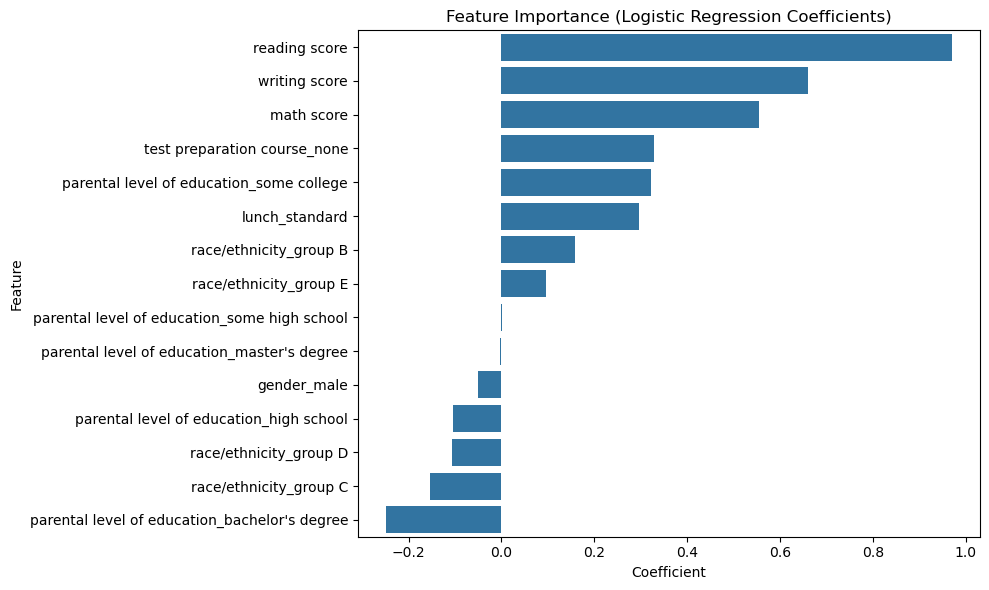

In [15]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.tight_layout()
plt.show()

In [19]:
failures = X_test[y_pred == 0]
recommendations = []

for i in failures.index:
    student_data = df.loc[i]
    rec = []

    if student_data['test preparation course'] == 'none':
        rec.append("Consider taking the test preparation course.")

    if student_data['lunch'] == 'free/reduced':
        rec.append("Ensure proper nutrition and energy before exams.")

    # Identify weakest subject
    scores = {
        'math': student_data['math score'],
        'reading': student_data['reading score'],
        'writing': student_data['writing score']
    }
    weakest = min(scores, key=scores.get)

    if weakest == 'math':
        rec.append("Focus more on practicing basic math concepts.")
    elif weakest == 'reading':
        rec.append("Work on reading comprehension and vocabulary.")
    else:
        rec.append("Improve writing skills with regular practice and grammar revision.")

    # If nothing matched
    if not rec:
        rec.append("Review study habits and maintain consistent practice.")

    recommendations.append((i, rec))

for idx, rec_list in recommendations:
    print(f"Student {idx}:")
    for r in rec_list:
        print(f"  - {r}")
    print()

Student 76:
  - Consider taking the test preparation course.
  - Improve writing skills with regular practice and grammar revision.

Student 59:
  - Consider taking the test preparation course.
  - Ensure proper nutrition and energy before exams.
  - Focus more on practicing basic math concepts.

Student 601:
  - Consider taking the test preparation course.
  - Focus more on practicing basic math concepts.

Student 66:
  - Consider taking the test preparation course.
  - Ensure proper nutrition and energy before exams.
  - Work on reading comprehension and vocabulary.

Student 327:
  - Consider taking the test preparation course.
  - Ensure proper nutrition and energy before exams.
  - Improve writing skills with regular practice and grammar revision.

Student 787:
  - Consider taking the test preparation course.
  - Focus more on practicing basic math concepts.

Student 528:
  - Consider taking the test preparation course.
  - Ensure proper nutrition and energy before exams.
  - Focus